Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

Import csv file into DataFrame

In [7]:
cluster_csv = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv"
df = pd.read_csv(cluster_csv)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
Check for NaNs


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

---
Basic Statistics of all features

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
Histogram Plot of all features

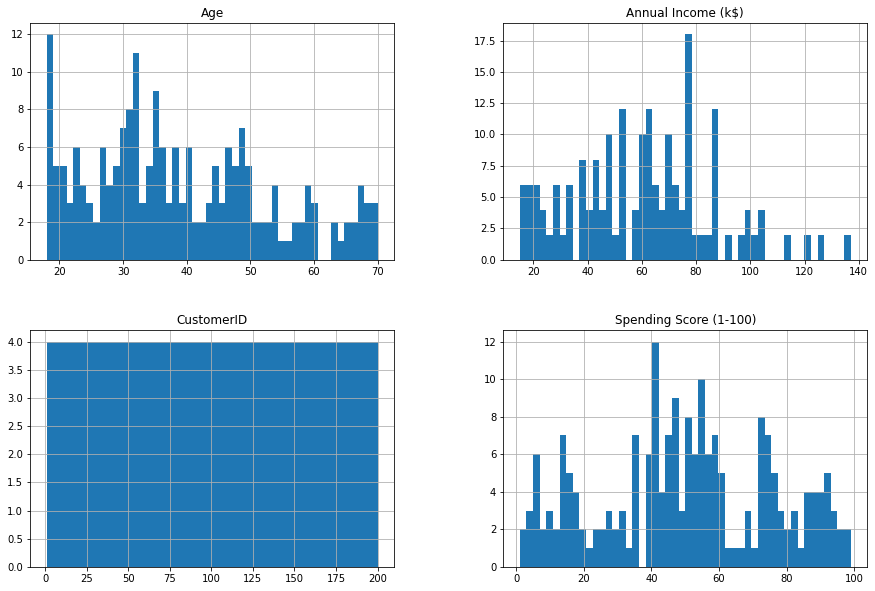

In [6]:
pl=df.hist(figsize=(15,10), bins=50)

Observation: `CustomerID` doesn't add any meaningful information

---

---
Looking for Outliers using "box plot"

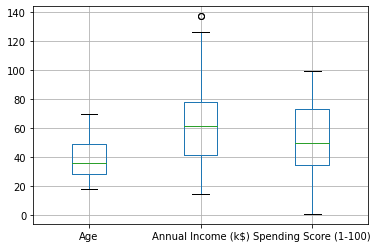

In [7]:
df.boxplot(column=['Age','Annual Income (k$)','Spending Score (1-100)'])

Observation: Here we can find some outliers in case of `Annual Income`.  

---

---
`Gender` Feature:

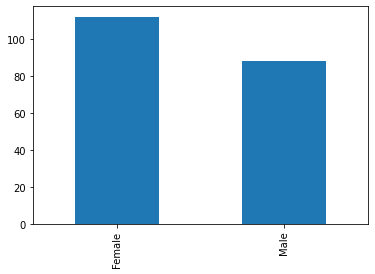

In [8]:
df.Gender.value_counts().plot(kind='bar')

Observation: There are more `Female` consumers than the `Male` ones.

---

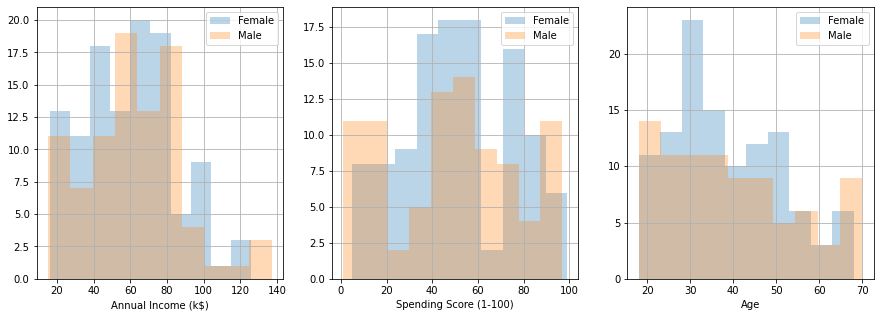

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(131)
df.groupby('Gender')['Annual Income (k$)'].hist(alpha=0.3, bins = 10)
plt.xlabel('Annual Income (k$)')
plt.legend(['Female','Male'])
plt.subplot(132)
df.groupby('Gender')['Spending Score (1-100)'].hist(alpha=0.3)
plt.xlabel('Spending Score (1-100)')
plt.legend(['Female','Male'])
plt.subplot(133)
df.groupby('Gender')['Age'].hist(alpha=0.3)
plt.xlabel('Age')
plt.legend(['Female','Male'])


Observation: All 3 features are similarly distributed for both `Male` and `Female`

Next, we'll check using scatter plot to see if we could form any clusters

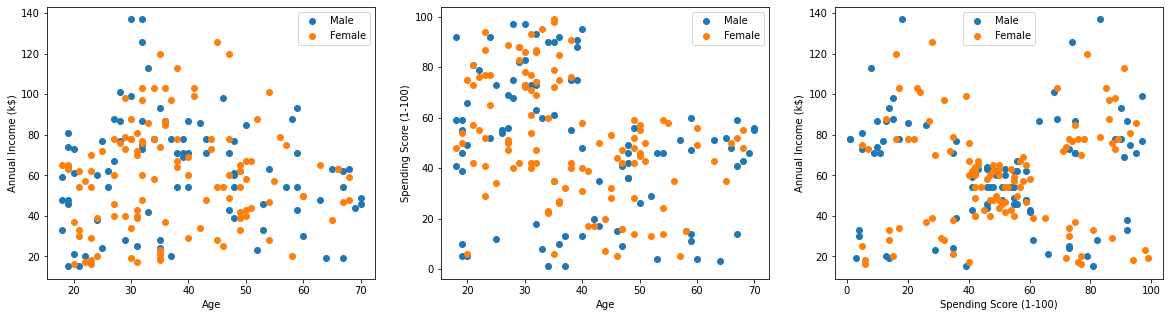

In [77]:
male = df[df.Gender == 'Male']
female = df[df.Gender == 'Female']
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(male.Age, male['Annual Income (k$)'], label = 'Male')
plt.scatter(female.Age, female['Annual Income (k$)'], label = 'Female')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(loc='best')

plt.subplot(132)
plt.scatter(male.Age, male['Spending Score (1-100)'], label = 'Male')
plt.scatter(female.Age, female['Spending Score (1-100)'], label = 'Female')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best')

plt.subplot(133)
plt.scatter(male['Spending Score (1-100)'], male['Annual Income (k$)'], label = 'Male')
plt.scatter(female['Spending Score (1-100)'], female['Annual Income (k$)'], label = 'Female')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend(loc='best')



Observation: `Gender` doesn't add to clustering as such.
So, we can continue with the other features

---
Feature pairwise plot using sns

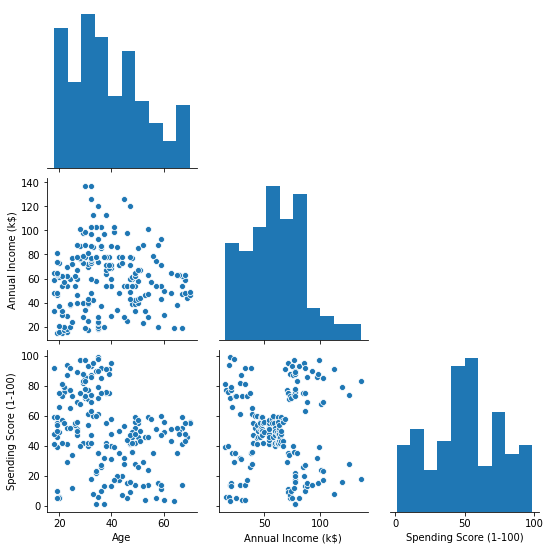

In [0]:
pl=sns.pairplot(df.drop(columns=['CustomerID']),corner=True)

Observation: It is clear that `Annual Income` and `Spending Score` form nice clusters from the pair plot.

---

---

As a start we can try clustering `Age` and `Spending Score (1-100)`

Text(0, 0.5, 'WCSS')

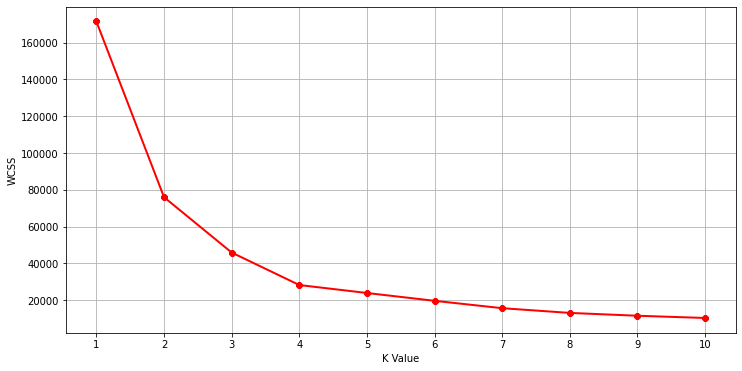

In [49]:
## Elbow method using the Within Cluster Sum of Squared Errors (WCSS) to decide on the number of clusters

from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df[['Age','Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")


So, we as the elbow is at 4, we divide the data into 4 clusters.

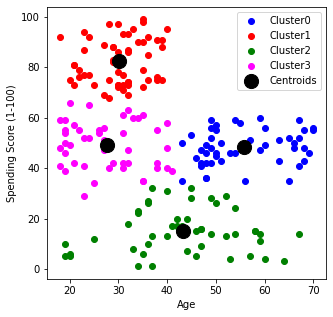

In [50]:
cl = KMeans(n_clusters=4)
df['cluster_preds']=cl.fit_predict(df[['Age','Spending Score (1-100)']])
centers = cl.cluster_centers_

plt.figure(figsize=(5,5))
cluster0 = df[df.cluster_preds==0]
cluster1 = df[df.cluster_preds==1]
cluster2 = df[df.cluster_preds==2]
cluster3 = df[df.cluster_preds==3]

plt.scatter(cluster0['Age'],cluster0['Spending Score (1-100)'],c='blue',label='Cluster0')
plt.scatter(cluster1['Age'],cluster1['Spending Score (1-100)'],c='red',label='Cluster1')
plt.scatter(cluster2['Age'],cluster2['Spending Score (1-100)'],c='green',label='Cluster2')
plt.scatter(cluster3['Age'],cluster3['Spending Score (1-100)'],c='magenta',label='Cluster3')

plt.scatter(centers[:, 0], centers[:, 1], c='black',s=200,label='Centroids')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.legend(loc='best')


Observations: So, looking at the clusters we can see, that younger people are more spendthrifts compared to aged people.

---

Now, we can try clustring `Age`, `Annual Income` and `Spending Score` features and visualize it using KMeans

Text(0, 0.5, 'WCSS')

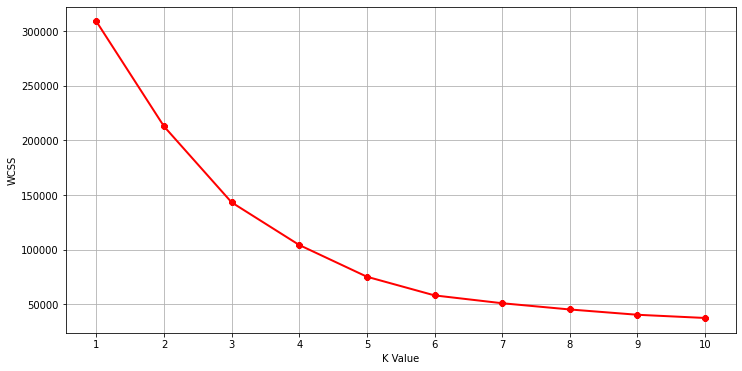

In [56]:
## Elbow method using the Within Cluster Sum of Squared Errors (WCSS) to decide on the number of clusters

from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df[['Annual Income (k$)','Age','Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

Observing at the elbove at 6, we will have 6 clusters

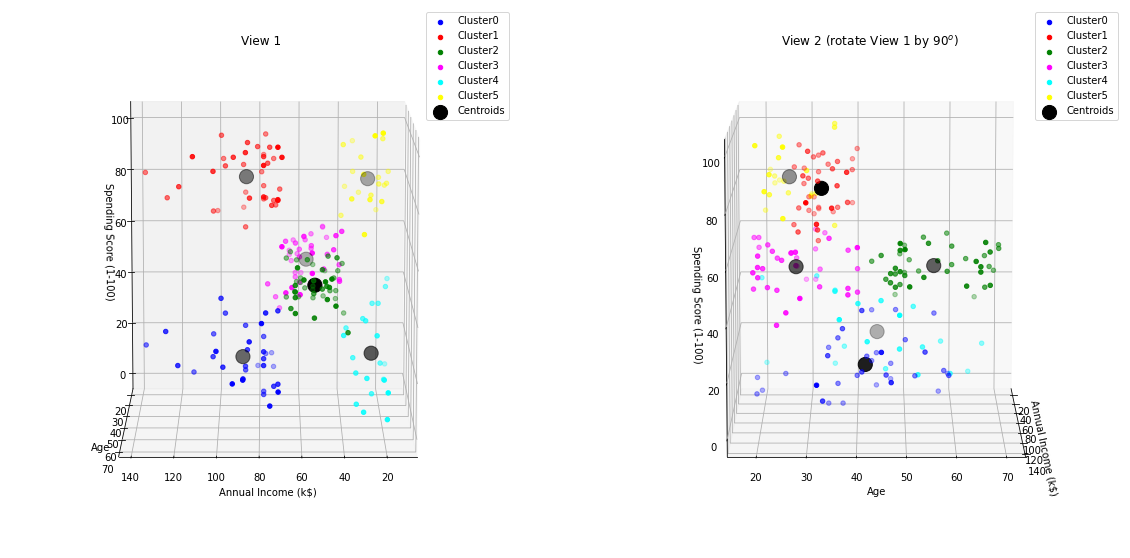

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cl = KMeans(n_clusters=6)
df['cluster_preds']=cl.fit_predict(df[['Annual Income (k$)','Age','Spending Score (1-100)']])
centers = cl.cluster_centers_

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
cluster0 = df[df.cluster_preds==0]
cluster1 = df[df.cluster_preds==1]
cluster2 = df[df.cluster_preds==2]
cluster3 = df[df.cluster_preds==3]
cluster4 = df[df.cluster_preds==4]
cluster5 = df[df.cluster_preds==5]


ax.scatter(cluster0['Annual Income (k$)'],cluster0['Age'],cluster0['Spending Score (1-100)'],c='blue',label='Cluster0')
ax.scatter(cluster1['Annual Income (k$)'],cluster1['Age'],cluster1['Spending Score (1-100)'],c='red',label='Cluster1')
ax.scatter(cluster2['Annual Income (k$)'],cluster2['Age'],cluster2['Spending Score (1-100)'],c='green',label='Cluster2')
ax.scatter(cluster3['Annual Income (k$)'],cluster3['Age'],cluster3['Spending Score (1-100)'],c='magenta',label='Cluster3')
ax.scatter(cluster4['Annual Income (k$)'],cluster4['Age'],cluster4['Spending Score (1-100)'],c='cyan',label='Cluster4')
ax.scatter(cluster5['Annual Income (k$)'],cluster5['Age'],cluster5['Spending Score (1-100)'],c='yellow',label='Cluster5')
ax.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='black',s=200,label='Centroids')
ax.set_xlabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_ylabel('Age')
ax.set_title('View 1')
ax.legend(loc='best')
ax.view_init(azim=90, elev=10)

ax = fig.add_subplot(122, projection='3d')

ax.scatter(cluster0['Annual Income (k$)'],cluster0['Age'],cluster0['Spending Score (1-100)'],c='blue',label='Cluster0')
ax.scatter(cluster1['Annual Income (k$)'],cluster1['Age'],cluster1['Spending Score (1-100)'],c='red',label='Cluster1')
ax.scatter(cluster2['Annual Income (k$)'],cluster2['Age'],cluster2['Spending Score (1-100)'],c='green',label='Cluster2')
ax.scatter(cluster3['Annual Income (k$)'],cluster3['Age'],cluster3['Spending Score (1-100)'],c='magenta',label='Cluster3')
ax.scatter(cluster4['Annual Income (k$)'],cluster4['Age'],cluster4['Spending Score (1-100)'],c='cyan',label='Cluster4')
ax.scatter(cluster5['Annual Income (k$)'],cluster5['Age'],cluster5['Spending Score (1-100)'],c='yellow',label='Cluster5')
ax.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='black',s=200,label='Centroids')
ax.set_xlabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_ylabel('Age')
ax.legend(loc='best')
ax.set_title('View 2 (rotate View 1 by 90$^o$)')
ax.view_init(azim=0, elev=10)

Observation: 5 decent clusters are formed using KMeans as shown above with centers 

(`Annual Income (k$)`, `Age`, `Spending Score (1-100)`):
1. `[56.7, 27. , 49.1]` => Late 20's aged consumers with moderate income and moderate spending score => "General" 
2. `[53.4, 56.2, 49.1]` => Early 50's aged consumers with moderate income and moderate spending score => "General"
3. `[88.2, 41.7, 17.3]` => Early 40's aged consumers with high annual income and low spending score => "Miser"
4. `[25.7, 25.3, 79.4]` => Mid 20's aged consumers with low annual income but high spending score => "Spendthrift"
5. `[25.1, 44.1, 19.5]` => Middle 40's aged consumers with low annual income and low spending score => "Economical"
6. `[86.5, 32.7, 82.1]` => Middle 30's aged consumers with high annual income and high spending score => "Rich"

